El codigo determinara si la calidad del vehiculo es mala, media o buena.

---


ENTRADAS: 


Precio:

    Caro
    Medio
    Barato

  Autopartes:
   
   Buenas   
   Regulares
   Malas

SALIDA

  Calidad del vehiculo:

    Alta
    Media
    Baja

REGLAS:

 Si el precio es alto y el las autopartes son buenas, la calidad del vehiculo es alta.

 si el precio es medio y el material de las autopartes es regular, la calidad del vehiculo es media.

 si el precio es bajo y el material de las autopartes es malo, la calidad del vehiculo es malo.

In [1]:
!pip install networkx==2.3
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 5.4 MB/s 
  Created wheel for networkx: filename=networkx-2.3-py2.py3-none-any.whl size=1556008 sha256=395c65faa9ecdcfc1bd90abf6124cc46a4991f3828ea526ba12cb7f3089a85be
  Stored in directory: /root/.cache/pip/wheels/44/e6/b8/4efaab31158e9e9ca9ed80b11f6b11130bac9a9672b3cbbeaf
Successfully built networkx
  Attempting uninstall: networkx
    Found existing installation: networkx 2.6.3
    Uninstalling networkx-2.6.3:
      Successfully uninstalled networkx-2.6.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |█████████

In [20]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


precio = ctrl.Antecedent(np.arange(0, 11, 1), 'precio')
autoparte = ctrl.Antecedent(np.arange(0, 11, 1), 'autoparte')
calidad = ctrl.Consequent(np.arange(0, 11, 1), 'calidad')


autoparte.automf(names=['mala', 'regular', 'buena'])
precio.automf(names=['bajo', 'medio', 'alto'])

calidad['mala'] = fuzz.trimf(calidad.universe, [0, 0, 5])
calidad['media'] = fuzz.trimf(calidad.universe, [0, 5, 10])
calidad['alta'] = fuzz.trimf(calidad.universe, [5, 10, 10])

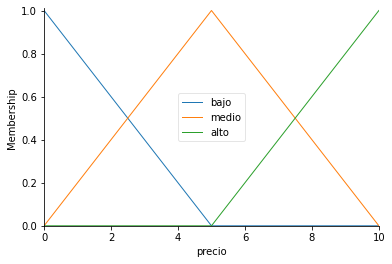

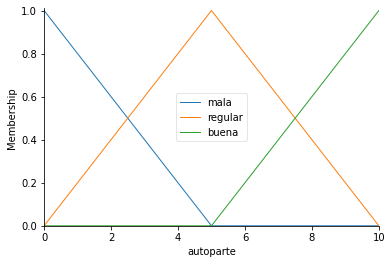

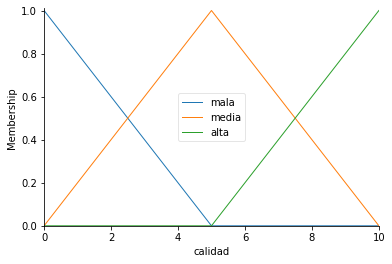

In [21]:
precio.view()
autoparte.view()
calidad.view()

In [22]:
R1 = ctrl.Rule(precio['alto'] & autoparte['buena'], calidad['alta'])
R2 = ctrl.Rule(autoparte['regular'], calidad['media'])
R3 = ctrl.Rule(precio['bajo'] | autoparte['mala'], calidad['mala'])
R4 = ctrl.Rule(precio['medio'] & autoparte['buena'], calidad['alta'])

In [23]:
calidad_ctrl = ctrl.ControlSystem([R1,R2,R3,R4])
calidad_sim = ctrl.ControlSystemSimulation(calidad_ctrl)

calidad_sim.input['precio'] = 6.5
calidad_sim.input['autoparte'] =9.4

calidad_sim.compute()

In [24]:
print("precio")
input = 6.5
for t in precio.terms: 
  mval = np.interp(input, precio.universe, precio[t].mf)
  print(t, mval)


print("\n--autopartes--")
input = 9.4
for t in autoparte.terms: 
  mval = np.interp(input, autoparte.universe, autoparte[t].mf)
  print(t, mval)

precio
bajo 0.0
medio 0.7
alto 0.30000000000000004

--autopartes--
mala 0.0
regular 0.11999999999999994
buena 0.8800000000000001


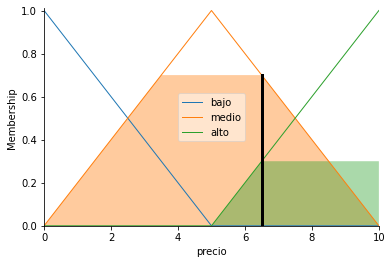

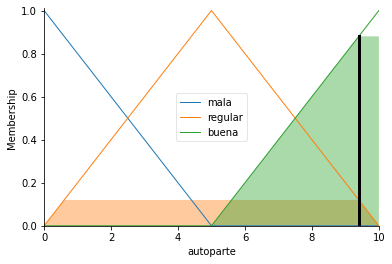

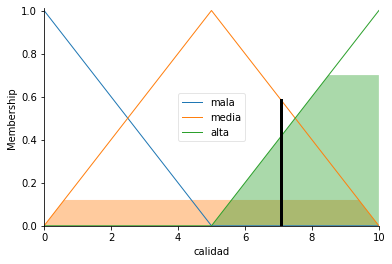

In [25]:
precio.view(sim=calidad_sim)
autoparte.view(sim=calidad_sim)
calidad.view(sim=calidad_sim)

In [26]:
print("calidad :",calidad_sim.output['calidad'])

calidad : 7.074381970794527
